# Average EHR Spending by City

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats
import seaborn as sns

In [2]:
## Load the datasets
df_ehr_provider = pd.read_csv('EHR_Incentive_Program_Payments_Providers.csv')
df_ehr_hospital = pd.read_csv('EHR_Incentive_Program_Payments_Hospitals.csv')
df_city_revenue = pd.read_csv('City_Revenues_Per_Capita.csv')
df_city_expenditure = pd.read_csv('City_Expenditures_Per_Capita.csv')

## Analysis for EHR per Capita for Individual Healthcare Providers

In [3]:
## delete the unneeded columns on the provider dataset
df_ehr_provider.drop(df_ehr_provider.columns[0:8],axis=1,inplace = True)
df_ehr_provider.drop(df_ehr_provider.columns[1:4],axis=1,inplace = True)
df_ehr_provider.drop(df_ehr_provider.columns[3:6],axis=1,inplace = True)
df_ehr_provider.drop(['Program_Ye','Payee_NPI','Latitude','Longitude','total_rece'],axis=1,inplace = True)
df_ehr_provider.head()


,Business_C,Payment_Ye,total_paym
0,Sacramento,2019,38250.0
1,Oakland,2014,21250.0
2,Antioch,2016,21250.0
3,Loma Linda,2015,29750.0
4,Orange,2014,21250.0


In [4]:
# group the practitioner data by city and year, then sum the total payments
df_ehr_provider['Business_C'] = df_ehr_provider['Business_C'].str.lower()
df_ehr_provider = df_ehr_provider.groupby(['Business_C','Payment_Ye'])['total_paym'].sum().reset_index()
df_ehr_provider.to_csv('test_group_by_check.csv')
df_ehr_provider.head()

,Business_C,Payment_Ye,total_paym
0,adelanto,2014,14166.67
1,adelanto,2015,21250.00
2,adelanto,2016,29750.00
3,agoura hills,2014,63750.00
4,agoura hills,2016,21250.00


In [5]:
# change all Entity Names to lower case
df_city_revenue['Entity Name'] = df_city_revenue['Entity Name'].str.lower()
df_city_revenue.head()

,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2021,22556106,36569.0,617.0
1,adelanto,2020,20455012,35663.0,574.0
2,adelanto,2019,20232000,35136.0,576.0
3,adelanto,2018,18224861,35293.0,516.0
4,adelanto,2017,15171753,34273.0,443.0


In [6]:
df_city_expenditure['Entity Name'] = df_city_revenue['Entity Name'].str.lower()
df_city_expenditure.head()

,Entity Name,Fiscal Year,Total Expenditures,Estimated Population,Expenditures Per Capita
0,adelanto,2021,20580944,36569.0,563.0
1,adelanto,2020,26376314,35663.0,740.0
2,adelanto,2019,30886709,35136.0,879.0
3,adelanto,2018,20531571,35293.0,582.0
4,adelanto,2017,16035685,34273.0,468.0


In [7]:
## merge the provider dataset with the city revenue dataset
df_provider_city = df_ehr_provider.merge(df_city_revenue, how="inner",left_on=['Business_C','Payment_Ye'],right_on=['Entity Name','Fiscal Year'])
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2014,14166.67,adelanto,2014,13047272,32511.0,401.0
1,adelanto,2015,21250.00,adelanto,2015,14051611,33084.0,425.0
2,adelanto,2016,29750.00,adelanto,2016,14565863,33497.0,435.0
3,agoura hills,2014,63750.00,agoura hills,2014,25485389,20625.0,1236.0
4,agoura hills,2016,21250.00,agoura hills,2016,28100766,21211.0,1325.0


In [8]:
## drop the duplicate columns
df_provider_city = df_provider_city.drop(['Entity Name','Fiscal Year'], axis=1)
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0
1,adelanto,2015,21250.00,14051611,33084.0,425.0
2,adelanto,2016,29750.00,14565863,33497.0,435.0
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0


In [9]:
## merge with the city expenditure dataset
df_provider_city = df_provider_city.merge(df_city_expenditure, how="inner",left_on=['Business_C','Payment_Ye', 'Estimated Population'],right_on=['Entity Name','Fiscal Year', 'Estimated Population'])
df_provider_city = df_provider_city.drop(['Entity Name','Fiscal Year'], axis=1)
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0


In [10]:
df_provider_city.to_csv('ultimate_test.csv')

In [11]:
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0


In [12]:
## create the "EHR per Capita" column by divide the total_paym by the estimated population in that year
df_provider_city['EHR Per Capita'] = df_provider_city['total_paym']/df_provider_city['Estimated Population']
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita,EHR Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0,0.435750
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0,0.642304
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0,0.888139
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0,3.090909
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0,1.001839


In [13]:
## sort the dataset
df_provider_city = df_provider_city.sort_values(['Business_C','Payment_Ye'],ascending = True)
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita,EHR Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0,0.435750
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0,0.642304
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0,0.888139
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0,3.090909
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0,1.001839


In [14]:
## Get the last entry for each city as the total payment they have received
df_provider_city_last = df_provider_city.groupby(['Business_C']).last()
df_provider_city_last.head()

,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita,EHR Per Capita
Business_C,,,,,,,,
adelanto,2016,29750.0,14565863,33497.0,435.0,23692799,707.0,0.888139
agoura hills,2016,21250.0,28100766,21211.0,1325.0,31218079,1472.0,1.001839
alameda,2020,191250.0,296672492,81312.0,3649.0,260518041,3204.0,2.352051
albany,2015,29750.0,28109961,18565.0,1514.0,24990215,1346.0,1.602478
alhambra,2020,46750.0,133617079,86792.0,1540.0,137772968,1587.0,0.538644


### Plot the preliminary histograms

(array([313.,  65.,  19.,   3.,   1.,   0.,   1.,   1.,   0.,   1.]),
 array([  350. ,  2504.8,  4659.6,  6814.4,  8969.2, 11124. , 13278.8,
        15433.6, 17588.4, 19743.2, 21898. ]),
 <BarContainer object of 10 artists>)

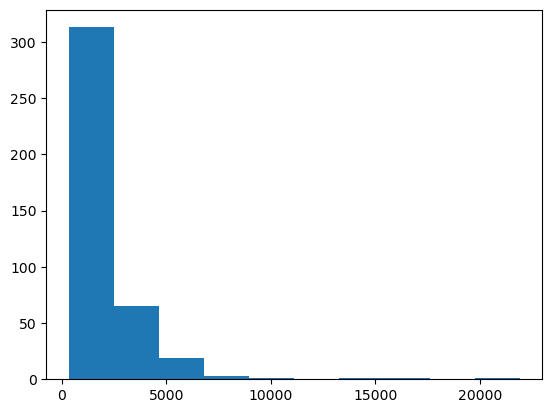

In [15]:
## plot the histogram for revenue per capita
plt.hist(df_provider_city_last['Revenues Per Capita'])

(array([352.,  42.,   5.,   2.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([  361. ,  3100.2,  5839.4,  8578.6, 11317.8, 14057. , 16796.2,
        19535.4, 22274.6, 25013.8, 27753. ]),
 <BarContainer object of 10 artists>)

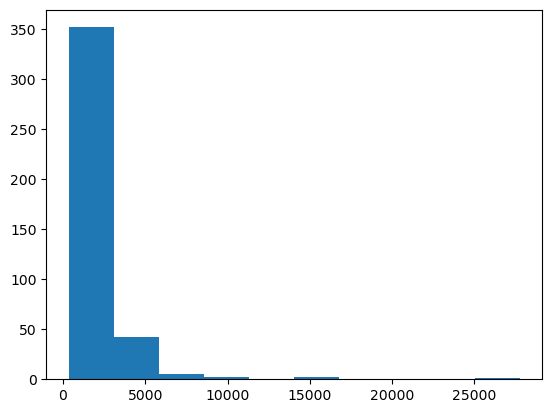

In [16]:
## plot the histogram for expenditure per capita
plt.hist(df_provider_city_last['Expenditures Per Capita'])

(array([368.,  23.,   5.,   3.,   3.,   0.,   0.,   0.,   0.,   2.]),
 array([1.41826458e-01, 2.05906068e+01, 4.10393871e+01, 6.14881674e+01,
        8.19369477e+01, 1.02385728e+02, 1.22834508e+02, 1.43283289e+02,
        1.63732069e+02, 1.84180849e+02, 2.04629630e+02]),
 <BarContainer object of 10 artists>)

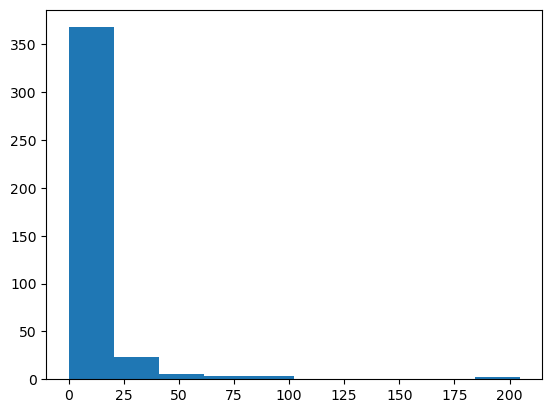

In [17]:
## plot the histogram for EHR per Capita
plt.hist(df_provider_city_last['EHR Per Capita'])

### Plotting scatterplot

<AxesSubplot:xlabel='Revenues Per Capita', ylabel='EHR Per Capita'>

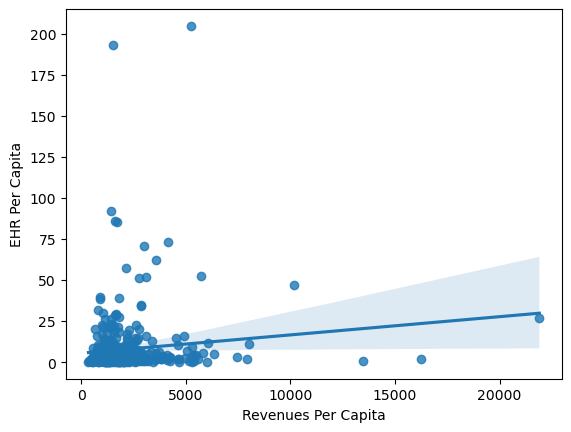

In [18]:
sns.regplot(x='Revenues Per Capita', y='EHR Per Capita', data=df_provider_city_last)

<AxesSubplot:xlabel='Expenditures Per Capita', ylabel='EHR Per Capita'>

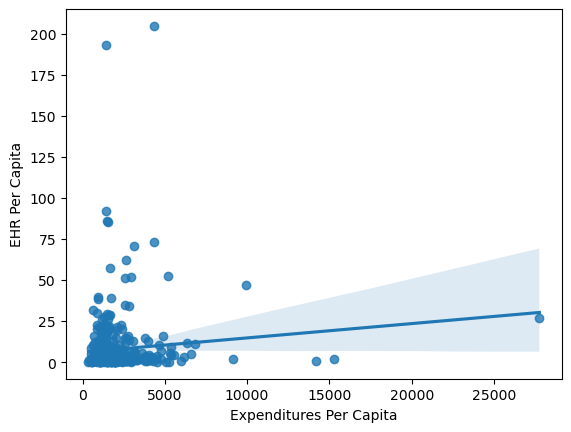

In [19]:
sns.regplot(x='Expenditures Per Capita', y='EHR Per Capita', data=df_provider_city_last)

### Regression Analysis

In [20]:
## Standard OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols

y = df_provider_city_last['EHR Per Capita']
x = df_provider_city_last['Revenues Per Capita']
z = df_provider_city_last['Expenditures Per Capita']

lm = ols('y ~ x + z', data = df_provider_city_last).fit()
table = sm.stats.anova_lm(lm)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     3.776
Date:                Fri, 18 Nov 2022   Prob (F-statistic):             0.0237
Time:                        00:01:04   Log-Likelihood:                -1745.0
No. Observations:                 404   AIC:                             3496.
Df Residuals:                     401   BIC:                             3508.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9251      1.406      3.502      0.0

In [21]:
## Use the Friedman rank test
stats.friedmanchisquare(df_provider_city_last['EHR Per Capita'],df_provider_city_last['Revenues Per Capita'],df_provider_city_last['Expenditures Per Capita'])

FriedmanchisquareResult(statistic=626.423791821561, pvalue=9.41460144601483e-137)

### Remove Outliers

In [22]:
Q1 = np.percentile(df_provider_city_last['Expenditures Per Capita'], 25)
Q3 = np.percentile(df_provider_city_last['Expenditures Per Capita'], 75)


In [23]:
df_provider_city_last_iqr = df_provider_city_last.loc[df_provider_city_last['Expenditures Per Capita'] > Q1]
df_provider_city_last_iqr = df_provider_city_last.loc[df_provider_city_last['Expenditures Per Capita'] < Q3]

In [44]:
y = df_provider_city_last_iqr['EHR Per Capita']
x = df_provider_city_last_iqr['Revenues Per Capita']
z = df_provider_city_last_iqr['Expenditures Per Capita']

lm = ols('y ~ x + z', data = df_provider_city_last_iqr).fit()
table = sm.stats.anova_lm(lm)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3736
Date:                Fri, 18 Nov 2022   Prob (F-statistic):              0.689
Time:                        00:02:52   Log-Likelihood:                -1261.2
No. Observations:                 303   AIC:                             2528.
Df Residuals:                     300   BIC:                             2540.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0809      2.880      1.764      0.0

(array([277.,  19.,   3.,   0.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([1.84920897e-01, 1.94773219e+01, 3.87697230e+01, 5.80621240e+01,
        7.73545250e+01, 9.66469260e+01, 1.15939327e+02, 1.35231728e+02,
        1.54524129e+02, 1.73816530e+02, 1.93108931e+02]),
 <BarContainer object of 10 artists>)

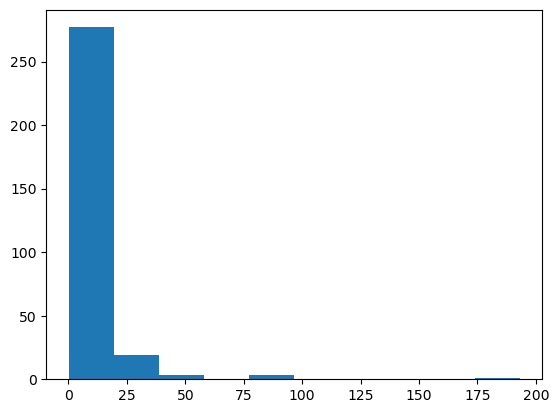

In [24]:
plt.hist(df_provider_city_last_iqr['EHR Per Capita'])

<AxesSubplot:xlabel='Revenues Per Capita', ylabel='EHR Per Capita'>

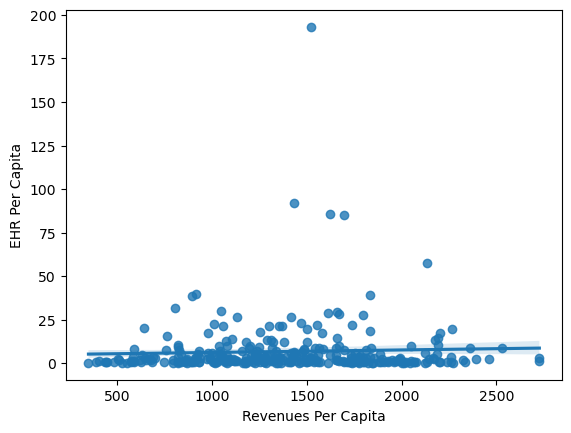

In [25]:
sns.regplot(x='Revenues Per Capita', y='EHR Per Capita', data=df_provider_city_last_iqr)

<AxesSubplot:xlabel='Expenditures Per Capita', ylabel='EHR Per Capita'>

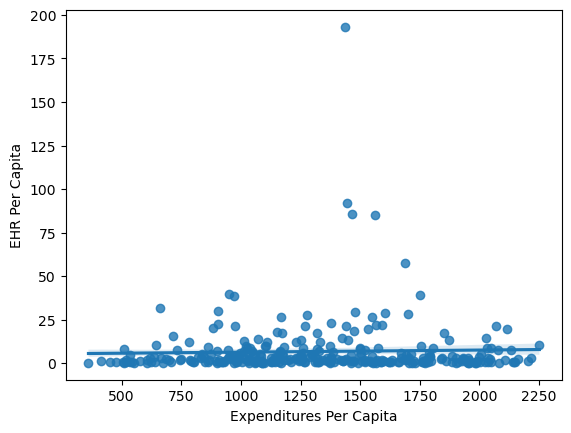

In [26]:
sns.regplot(x='Expenditures Per Capita', y='EHR Per Capita', data=df_provider_city_last_iqr)

## Hospital Analysis

In [27]:
df_ehr_hospital = pd.read_csv('EHR_Incentive_Program_Payments_Hospitals.csv')

In [28]:
## delete the unneeded columns
df_ehr_hospital.drop(df_ehr_hospital.columns[0:7],axis=1,inplace = True)
df_ehr_hospital.drop(df_ehr_hospital.columns[1:7],axis=1,inplace = True)
df_ehr_hospital.drop(df_ehr_hospital.columns[2:7],axis=1,inplace = True)
df_ehr_hospital.head()

,Business_City,total_payments,Last_Payment_Year
0,Eureka,1530950.70,2016
1,Hayward,3245920.28,2016
2,Napa,1262015.89,2016
3,Jackson,865130.13,2019
4,San Francisco,984465.12,2019


In [29]:
# change 'Business_City' to all lowercase
df_ehr_hospital['Business_City'] = df_ehr_hospital['Business_City'].str.lower()
df_ehr_hospital.groupby(['Business_City','Last_Payment_Year'])['total_payments'].sum().reset_index()
df_ehr_hospital.head()

,Business_City,total_payments,Last_Payment_Year
0,eureka,1530950.70,2016
1,hayward,3245920.28,2016
2,napa,1262015.89,2016
3,jackson,865130.13,2019
4,san francisco,984465.12,2019


In [30]:
# merge the hospitals and revenue datasets
df_hospital_city = df_ehr_hospital.merge(df_city_revenue, how="inner",left_on=['Business_City','Last_Payment_Year'],right_on=['Entity Name','Fiscal Year'])
df_hospital_city = df_hospital_city.drop(['Entity Name','Fiscal Year'],axis=1)
df_hospital_city.head()

,Business_City,total_payments,Last_Payment_Year,Total Revenues,Estimated Population,Revenues Per Capita
0,eureka,1530950.70,2016,55902988,26765.0,2089.0
1,hayward,3245920.28,2016,384574265,158985.0,2419.0
2,napa,1262015.89,2016,217089340,80576.0,2694.0
3,jackson,865130.13,2019,11312084,4770.0,2372.0
4,san francisco,984465.12,2019,12233359073,883869.0,13841.0


In [31]:
df_hospital_city = df_hospital_city.merge(df_city_expenditure, how="inner",left_on=['Business_City','Last_Payment_Year','Estimated Population'],right_on=['Entity Name','Fiscal Year','Estimated Population'])
df_hospital_city = df_hospital_city.drop(['Entity Name','Fiscal Year'],axis=1)
df_hospital_city = df_hospital_city.sort_values(['Business_City','Last_Payment_Year'],ascending=True)
df_hospital_city['EHR Per Capita'] = df_hospital_city['total_payments'] / df_hospital_city['Estimated Population']
df_hospital_city.head()

,Business_City,total_payments,Last_Payment_Year,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita,EHR Per Capita
123,alameda,757172.90,2013,166123124,75126.0,2211.0,157177102,2092.0,10.078706
149,alhambra,1403667.18,2016,115993675,86782.0,1337.0,108343335,1248.0,16.174635
277,alturas,797141.17,2019,5008239,2755.0,1818.0,5382306,1954.0,289.343437
190,anaheim,1178754.07,2015,1315642721,351433.0,3744.0,1360977806,3873.0,3.354136
130,anaheim,2016249.98,2016,1177907888,358136.0,3289.0,1184264881,3307.0,5.629844


In [32]:
df_hospital_city_last = df_hospital_city.groupby(['Business_City']).last()
df_hospital_city_last.head()

,total_payments,Last_Payment_Year,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita,EHR Per Capita
Business_City,,,,,,,,
alameda,757172.90,2013,166123124,75126.0,2211.0,157177102,2092.0,10.078706
alhambra,1403667.18,2016,115993675,86782.0,1337.0,108343335,1248.0,16.174635
alturas,797141.17,2019,5008239,2755.0,1818.0,5382306,1954.0,289.343437
anaheim,518166.28,2020,1371402716,357325.0,3838.0,1494985018,4184.0,1.450126
antioch,389401.28,2020,152951569,112520.0,1359.0,141447334,1257.0,3.460729


### Regression and analysis

(array([97., 41., 16.,  7.,  3.,  2.,  1.,  1.,  0.,  1.]),
 array([  594. ,  1880.7,  3167.4,  4454.1,  5740.8,  7027.5,  8314.2,
         9600.9, 10887.6, 12174.3, 13461. ]),
 <BarContainer object of 10 artists>)

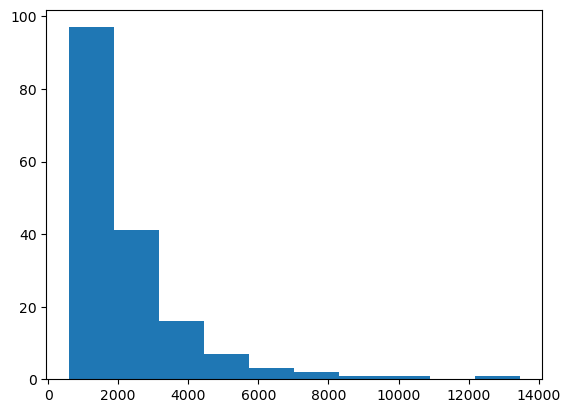

In [33]:
plt.hist(df_hospital_city_last['Revenues Per Capita'])

(array([100.,  43.,  14.,   7.,   0.,   3.,   1.,   0.,   0.,   1.]),
 array([  518. ,  1882.2,  3246.4,  4610.6,  5974.8,  7339. ,  8703.2,
        10067.4, 11431.6, 12795.8, 14160. ]),
 <BarContainer object of 10 artists>)

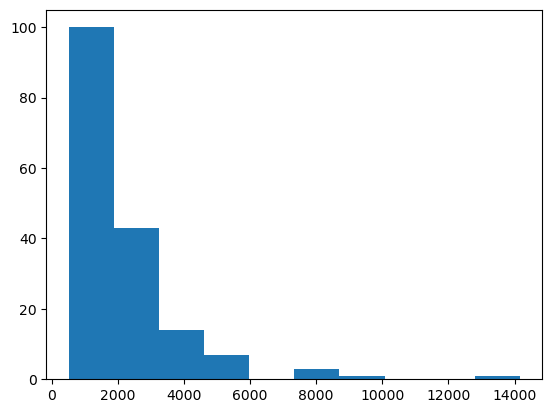

In [34]:
plt.hist(df_hospital_city_last['Expenditures Per Capita'])

(array([99., 31., 19.,  6.,  6.,  2.,  4.,  1.,  0.,  1.]),
 array([1.38620918e-02, 3.85749473e+01, 7.71360326e+01, 1.15697118e+02,
        1.54258203e+02, 1.92819288e+02, 2.31380374e+02, 2.69941459e+02,
        3.08502544e+02, 3.47063629e+02, 3.85624714e+02]),
 <BarContainer object of 10 artists>)

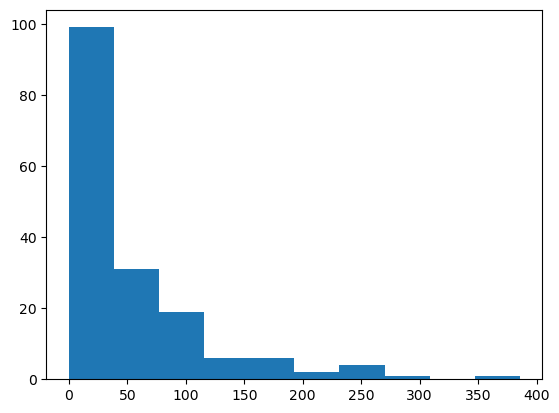

In [35]:
plt.hist(df_hospital_city_last['EHR Per Capita'])

### Regressions

#### Linear Regression

In [36]:
y = df_hospital_city_last['EHR Per Capita']
x = df_hospital_city_last['Revenues Per Capita']
z = df_hospital_city_last['Expenditures Per Capita']

lm = ols('y ~ x + z', data = df_hospital_city_last).fit()
table = sm.stats.anova_lm(lm)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6661
Date:                Fri, 18 Nov 2022   Prob (F-statistic):              0.515
Time:                        00:01:05   Log-Likelihood:                -941.68
No. Observations:                 169   AIC:                             1889.
Df Residuals:                     166   BIC:                             1899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.0496      8.084      6.686      0.0

In [37]:
## Use the Friedman rank test
stats.friedmanchisquare(df_hospital_city_last['EHR Per Capita'],df_hospital_city_last['Revenues Per Capita'],df_hospital_city_last['Expenditures Per Capita'])

FriedmanchisquareResult(statistic=275.89349112426044, pvalue=1.2316565076515209e-60)

### Removeing Outliers

In [38]:
Q1 = np.percentile(df_hospital_city_last['Expenditures Per Capita'], 25)
Q3 = np.percentile(df_hospital_city_last['Expenditures Per Capita'], 75)

In [39]:
df_hospital_city_last_iqr = df_hospital_city_last.loc[df_hospital_city_last['Expenditures Per Capita'] > Q1]
df_hospital_city_last_iqr = df_hospital_city_last.loc[df_hospital_city_last['Expenditures Per Capita'] < Q3]

(array([277.,  19.,   3.,   0.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([1.84920897e-01, 1.94773219e+01, 3.87697230e+01, 5.80621240e+01,
        7.73545250e+01, 9.66469260e+01, 1.15939327e+02, 1.35231728e+02,
        1.54524129e+02, 1.73816530e+02, 1.93108931e+02]),
 <BarContainer object of 10 artists>)

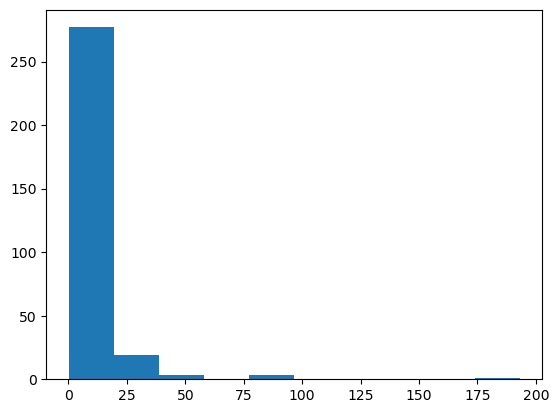

In [40]:
plt.hist(df_provider_city_last_iqr['EHR Per Capita'])

<AxesSubplot:xlabel='Revenues Per Capita', ylabel='EHR Per Capita'>

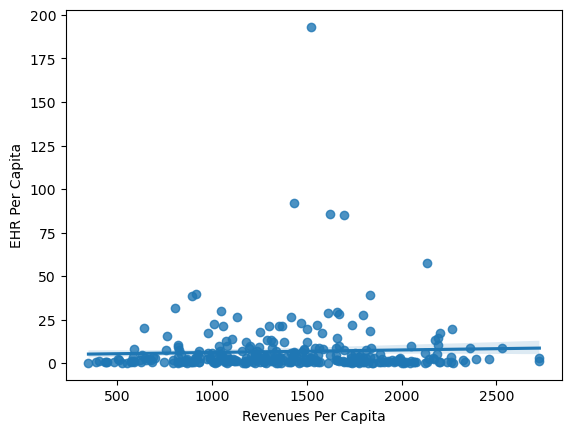

In [41]:
sns.regplot(x='Revenues Per Capita', y='EHR Per Capita', data=df_provider_city_last_iqr)

<AxesSubplot:xlabel='Expenditures Per Capita', ylabel='EHR Per Capita'>

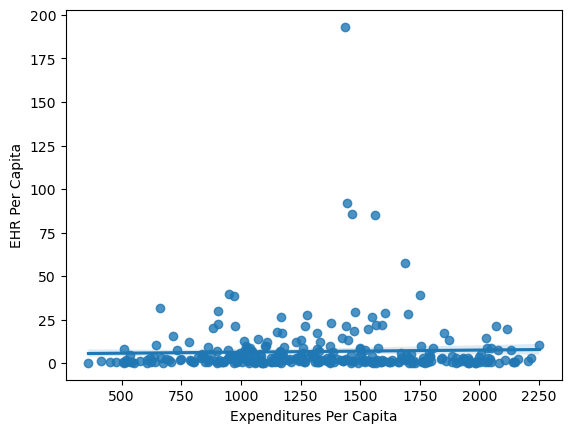

In [42]:
sns.regplot(x='Expenditures Per Capita', y='EHR Per Capita', data=df_provider_city_last_iqr)

In [43]:
y = df_hospital_city_last_iqr['EHR Per Capita']
x = df_hospital_city_last_iqr['Revenues Per Capita']
z = df_hospital_city_last_iqr['Expenditures Per Capita']

lm = ols('y ~ x + z', data = df_hospital_city_last_iqr).fit()
table = sm.stats.anova_lm(lm)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6457
Date:                Fri, 18 Nov 2022   Prob (F-statistic):              0.526
Time:                        00:01:06   Log-Likelihood:                -701.76
No. Observations:                 126   AIC:                             1410.
Df Residuals:                     123   BIC:                             1418.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.8604     19.026      1.990      0.0